In [1]:
import pandas as pd 
import numpy as nm  
import matplotlib.pyplot as mtp  # for data visualization purposes
from sklearn.metrics import accuracy_score, classification_report

dsTest = pd.read_csv('test.csv')
print(" Testing dataset info")
dsTest.head()

In [2]:
dsTrain = pd.read_csv('train.csv')
print("Training dataset info")
dsTrain.head()


Training dataset info


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
dsTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

C:\Users\HP\anaconda3\new_ana1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


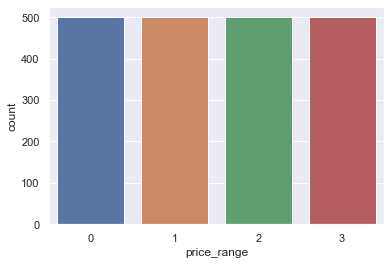

In [4]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

g = sns.countplot(dsTrain['price_range'])
g.set_xticklabels(['0','1','2','3'])
plt.show()

In [13]:
x = dsTrain.iloc[:,0:20].values  
y = dsTrain.iloc[:, 20].values 
#x= dsTrain.loc[:, 'battery_power':'wifi'].values 
#print(x)
#print(y)

In [14]:
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)  

In [15]:

from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test) 


In [8]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

# Predicting the Test set results  
y_pred = classifier.predict(x_test)  
#print(y_pred)
#print(y_test)


In [9]:
from sklearn.metrics import confusion_matrix  
cf_matrix = confusion_matrix(y_test, y_pred) 
print(cf_matrix)

[[117  15   0   0]
 [ 12  85  21   0]
 [  0  17  85  18]
 [  0   0  21 109]]


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       132
           1       0.73      0.72      0.72       118
           2       0.67      0.71      0.69       120
           3       0.86      0.84      0.85       130

    accuracy                           0.79       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.79      0.79      0.79       500



In [11]:
from sklearn.metrics import accuracy_score

print(' accuracy:')
print((accuracy_score(y_test, y_pred)))

 accuracy:
0.792
